In [313]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
poly = np.polynomial.Polynomial

from astropy.io import ascii

from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d
from scipy.misc import derivative

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [314]:
easymini = ascii.read("OYEasyMini.csv", data_start = 30)
stratologger = ascii.read("OYStratologger.txt", data_start = 15)

In [315]:
#easymini
#stratologger

In [316]:
emAlt = easymini["altitude"]
emPress = easymini["pressure"]
emAccel = easymini["acceleration"]
emTime = easymini["time"]

slAlt = stratologger["col2"]
slVel = stratologger["col3"]
slTime = stratologger["col1"]

# Altitude


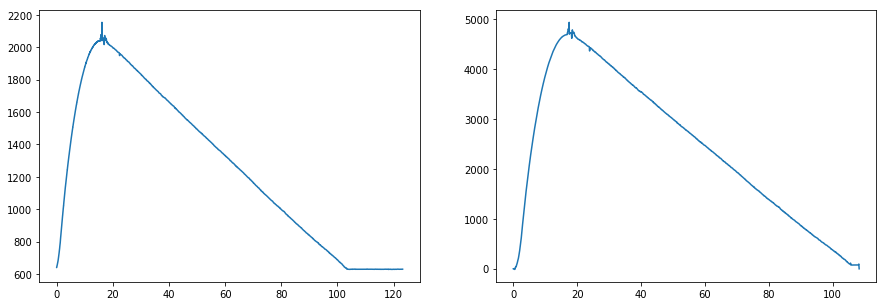

In [317]:
# base data plot

figure(figsize = (15,5))

subplot(121)
plot(emTime, emAlt)

subplot(122)
plot(slTime, slAlt)

In [318]:
# adjust all values based on first (equalize?)
# willed be called adjusted source values in future references

emAltAdj = [x-emAlt[0] for x in emAlt]
slAltAdj = [x-emAlt[0] for x in slAlt]

Text(0.5,1,'Stratologger Altitude')

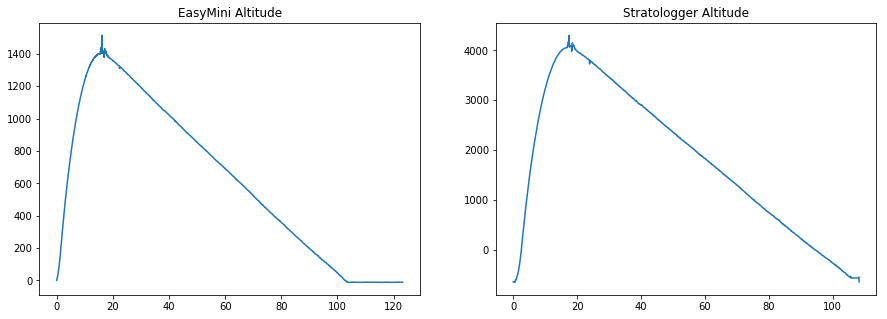

In [319]:
# plot adjusted source values

figure(figsize = (15,5))

subplot(121)
plot(emTime, emAltAdj)
title("EasyMini Altitude")

subplot(122)
plot(slTime, slAltAdj)
title("Stratologger Altitude")

In [320]:
# "smooth" altitude by determining difference between adjacent values and changing it if its within a certain value
# called numerically smoothed values in future references

emAltAdj = [x-emAlt[0] for x in emAlt] #re-make emAltAdj so you dont compound adjustments
for x in range(1, len(emAltAdj)):
    if abs(emAltAdj[x] - emAltAdj[x-1]) > 5: #5 is minimum difference to maintain accuracy and relative "smoothness"
        emAltAdj[x] = emAltAdj[x-1]
        
slAltAdj = [x-slAlt[0] for x in slAlt] #re-make slAltAdj so you dont compound adjustments
slAltAdj = [x/3.2808 for x in slAltAdj] #ft to m
for x in range(1, len(slAltAdj)):
    if abs(slAltAdj[x] - slAltAdj[x-1]) > 13: #13 is minimum difference to maintain accuracy and relative "smoothness"
        slAltAdj[x] = slAltAdj[x-1]

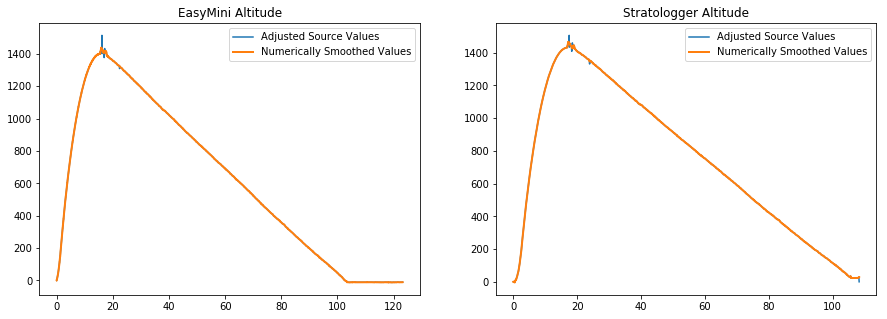

In [321]:
# plot adjusted source values to numerically smoothed values

figure(figsize = (15,5))

subplot(121)
plot(emTime, [x-emAlt[0] for x in emAlt], label = "Adjusted Source Values") #re-adjusted source values
plot(emTime, emAltAdj, lw = 2, label = "Numerically Smoothed Values")
title("EasyMini Altitude")
legend()

subplot(122)
plot(slTime, [(x-slAlt[0])/3.2808 for x in slAlt], label = "Adjusted Source Values") #ft to m and re-adjusted values
plot(slTime, slAltAdj, lw = 2, label = "Numerically Smoothed Values")
title("Stratologger Altitude")
legend()

In [322]:
# print numerically smoothed max altitude

print "(EM) Maximum altitude (m):", max(emAltAdj)
print "(EM) Maximum altitude (ft):", max(emAltAdj)*3.2808

print "(SL) Maximum altitude (m):", max(slAltAdj)
print "(SL) Maximum altitude (ft):", max(slAltAdj)*3.2808

(EM) Maximum altitude (m): 1438.2700000000002
(EM) Maximum altitude (ft): 4718.676216000001
(SL) Maximum altitude (m): 1466.7154352596926
(SL) Maximum altitude (ft): 4812.0


In [323]:
# gaussian smoothing

emAltSmooth = gaussian_filter1d(emAltAdj, 15)
slAltSmooth = gaussian_filter1d(slAltAdj, 15)

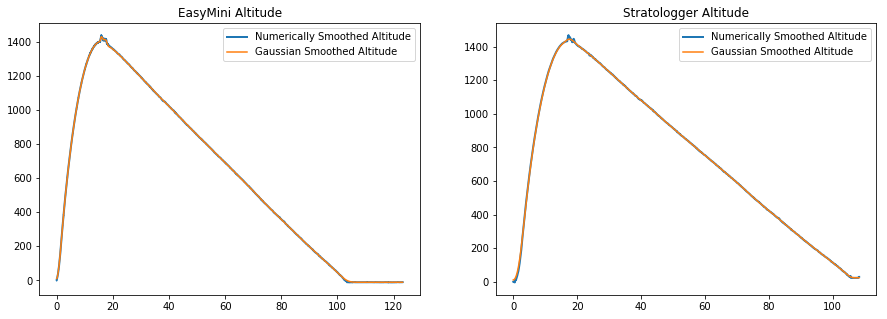

In [324]:
# plot gaussian smoothed values

figure(figsize = (15,5))

subplot(121)
plot(emTime, emAltAdj, lw = 2, label = "Numerically Smoothed Altitude")
plot(emTime, emAltSmooth, label = "Gaussian Smoothed Altitude")
title("EasyMini Altitude")
legend()

subplot(122)
plot(slTime, slAltAdj, lw = 2, label = "Numerically Smoothed Altitude")
plot(slTime, slAltSmooth, label = "Gaussian Smoothed Altitude")
title("Stratologger Altitude")
legend()

In [325]:
# print gaussian smoothed max altitudes

print "(EM) Maximum altitude (m):", max(emAltSmooth)
print "(EM) Maximum altitude (ft):", max(emAltSmooth)*3.2808

print "(SL) Maximum altitude (m):", max(slAltSmooth)
print "(SL) Maximum altitude (ft):", max(slAltSmooth)*3.2808

(EM) Maximum altitude (m): 1430.2862703859578
(EM) Maximum altitude (ft): 4692.483195882251
(SL) Maximum altitude (m): 1444.1520560862884
(SL) Maximum altitude (ft): 4737.974065607896


# Velocity

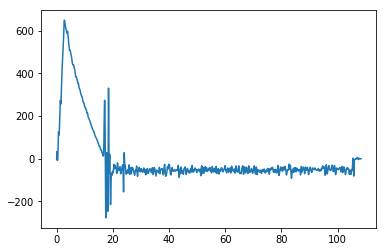

In [390]:
# base data plot

plot(slTime, slVel)

# no base valocity data from easymini, calculated in folowing cells

In [391]:
emVel = [0.0] + [dx / dt for dx, dt in zip(diff(emAlt), diff(emTime))]

c:\python27\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


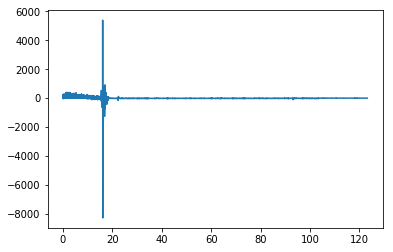

In [392]:
plot(emTime, emVel)

In [407]:
emVelAdj = list(emVel)
slVelAdj = list(slVel)
slVelAdj = [x/3.2808 for x in slVelAdj] #ft to m

In [416]:
# "smooth" velocity by determining difference between adjacent values and changing it if its within a certain value
# called numerically smoothed values in future references


for x in range(1, len(emVelAdj)):
    if abs(emVelAdj[x] - emVelAdj[x-1]) > 50: #5 is minimum difference to maintain accuracy and relative "smoothness"
        #emVelAdj[x] = (emVelAdj[x-1] + emVelAdj[x])/2
        emVelAdj[x] = emVelAdj[x-1]
        
for x in range(1, len(slVelAdj)):
    if abs(slVelAdj[x] - slVelAdj[x-1]) > 50:
        slVelAdj[x] = (slVelAdj[x-1] + slVelAdj[x])/2
        
for x in range(1, len(emVelAdj)):
    if abs(emVelAdj[x] - emVelAdj[x-1]) > 10: #5 is minimum difference to maintain accuracy and relative "smoothness"
        emVelAdj[x] = (emVelAdj[x-1] + emVelAdj[x])/2
        emVelAdj[x] = (emVelAdj[x-1] + emVelAdj[x])/2
        emVelAdj[x] = (emVelAdj[x-1] + emVelAdj[x])/2

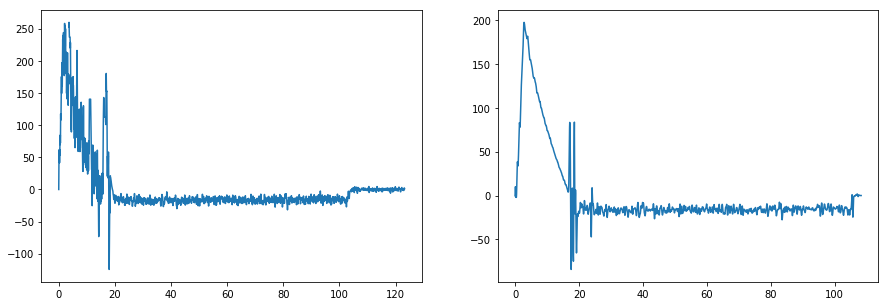

In [417]:
# base data plot

figure(figsize = (15,5))

subplot(121)
plot(emTime, emVelAdj)

subplot(122)
plot(slTime, slVelAdj)

1612
1703
